<a href="https://colab.research.google.com/github/mariahmota/FCE_aula/blob/main/Exemplo_aquecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from dataclasses import dataclass
import numpy as np
from scipy.integrate import solve_ivp


In [2]:
@dataclass
class ParametrosAquecimento:
  T0: float = 25.0 # temperatura inicial (°C)
  Q: float = 5000.0 # coef. de transf. de calor
  U: float =  150.0
  A: float = 5.0
  ta: float = 25.0 # temperatura ambiente
  m: float = 50.0 # massa (kg)
  cp: float = 1670.0

In [4]:
def modelo_aquecimento(t, T, par):

  Q, U, A, ta, m, cp = par.Q, par.U, par.A, par.ta, par.m, par.cp
  dTdt = (Q - U*A*(T-ta))/(m*cp)

  return dTdt

def simula_aquecimento(tempo, par):

  T0 = par.T0
  teval = np.linspace(tempo[0], tempo[-1], 100)
  sol = solve_ivp(modelo_aquecimento, tempo, [T0], t_eval=teval, args=(par,), methofd = 'BDF')

  return sol.t, sol.y[0]


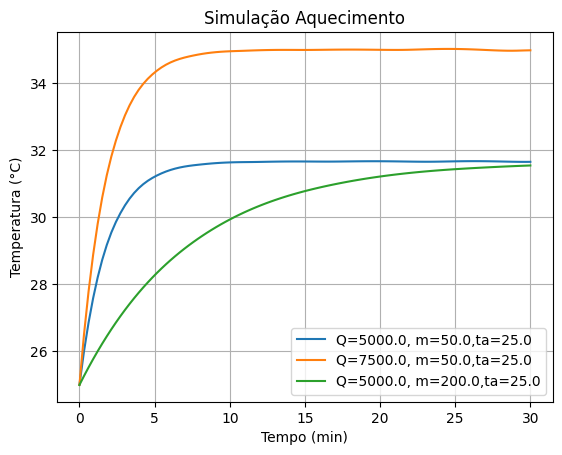

In [11]:
conjunto = [ParametrosAquecimento(),
            ParametrosAquecimento(Q=7500.0),
            ParametrosAquecimento(m=200.0)]

tempo = [0, 30*60] # tempo em segundos

for params in conjunto:
  t, T = simula_aquecimento(tempo, params) # meu t é o tempo
  Q, m, ta = params.Q, params.m, params.ta
  plt.plot(t/60, T, label = f"Q={Q}, m={m},ta={ta}")

plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Simulação Aquecimento")
plt.grid()
plt.legend()
plt.show()


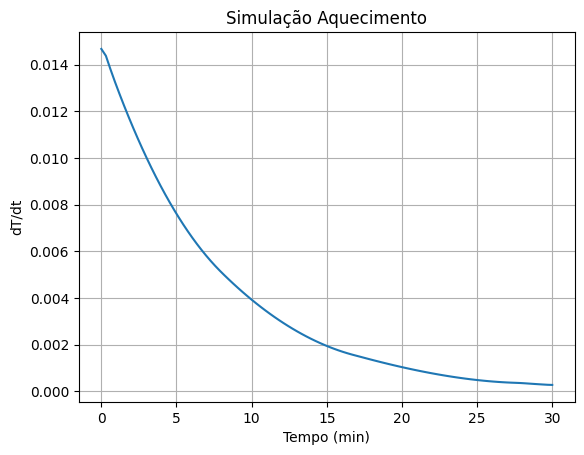

In [12]:
dTdt = np.gradient(T,t) # derivação da temperatura (T) em relação ao tempo (t)

plt.plot(t/60, dTdt)
plt.xlabel("Tempo (min)")
plt.ylabel("dT/dt")
plt.title("Simulação Aquecimento")
plt.grid()
plt.show()

In [14]:
import pandas as pd

resultado = pd.DataFrame({'t': t, 'T': T, 'dT/dt': dTdt})
resultado.to_csv('resultado.csv', index=False)

print(resultado)

              t          T     dT/dt
0      0.000000  25.000000  0.014669
1     18.181818  25.266702  0.014375
2     36.363636  25.522734  0.013800
3     54.545455  25.768538  0.013255
4     72.727273  26.004722  0.012736
..          ...        ...       ...
95  1727.272727  31.525022  0.000318
96  1745.454545  31.530689  0.000305
97  1763.636364  31.536128  0.000293
98  1781.818182  31.541351  0.000281
99  1800.000000  31.546364  0.000276

[100 rows x 3 columns]
